In [1]:
pip install pandas numpy matplotlib scikit-learn openpyxl


  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.4.0-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached

In [9]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [13]:
X_train = train_df.drop(columns=["Activity"])
y_train = train_df["Activity"]

X_test = test_df.drop(columns=["Activity"])
y_test = test_df["Activity"]


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9267051238547676
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.90      0.91       491
          STANDING       0.91      0.92      0.92       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.89      0.91      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



In [17]:
import numpy as np

# Use first 3 columns as accelerometer (adjust if needed)
acc_mag = np.linalg.norm(X_test_scaled[:, :3], axis=1)

threshold = acc_mag.mean() + 3 * acc_mag.std()
fall_events = acc_mag > threshold

print("Number of fall-like events detected:", fall_events.sum())


Number of fall-like events detected: 44


In [18]:
import numpy as np

# Use first 3 columns as accelerometer (adjust if needed)
acc_mag = np.linalg.norm(X_test_scaled[:, :3], axis=1)

threshold = acc_mag.mean() + 3 * acc_mag.std()
fall_events = acc_mag > threshold

print("Number of fall-like events detected:", fall_events.sum())


Number of fall-like events detected: 44


In [19]:
if fall_events.sum() == 0:
    risk = "Low"
elif fall_events.sum() <= 2:
    risk = "Medium"
else:
    risk = "High"

print("Risk Level:", risk)


Risk Level: High


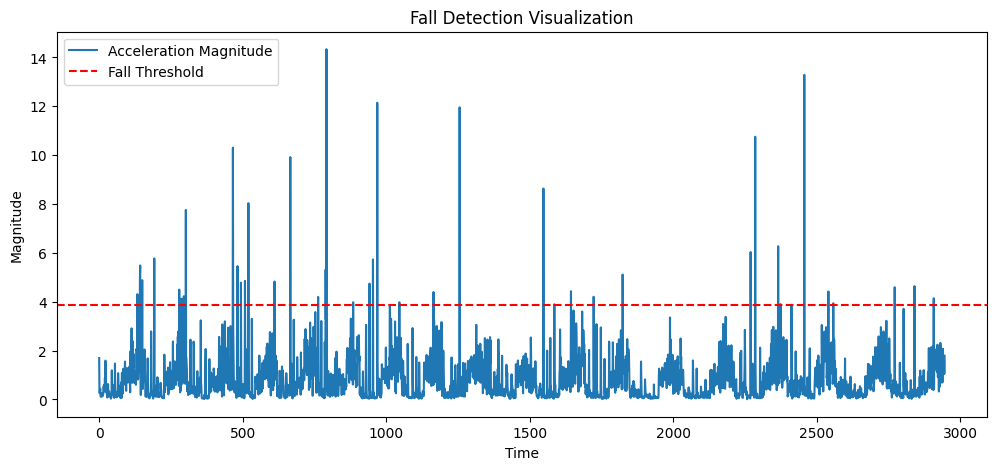

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(acc_mag, label="Acceleration Magnitude")
plt.axhline(threshold, color="red", linestyle="--", label="Fall Threshold")
plt.legend()
plt.title("Fall Detection Visualization")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()


In [23]:
X_train = train_df.drop(columns=["Activity"])
y_train = train_df["Activity"]

X_test = test_df.drop(columns=["Activity"])
y_test = test_df["Activity"]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from sklearn.ensemble import RandomForestClassifier

activity_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

activity_model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [26]:
from sklearn.metrics import accuracy_score, classification_report

activity_pred = activity_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, activity_pred))
print(classification_report(y_test, activity_pred))


Accuracy: 0.9267051238547676
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.90      0.91       491
          STANDING       0.91      0.92      0.92       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.89      0.91      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



In [27]:
from sklearn.ensemble import IsolationForest

iso_model = IsolationForest(
    n_estimators=100,
    contamination=0.02,   # expected anomaly ratio
    random_state=42
)

iso_model.fit(X_train_scaled)


,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.02
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [28]:
anomaly_pred = iso_model.predict(X_test_scaled)

# -1 = anomaly, 1 = normal
fall_events = (anomaly_pred == -1)

print("Number of detected fall-like events:", fall_events.sum())


Number of detected fall-like events: 15


In [29]:
num_falls = fall_events.sum()

if num_falls == 0:
    risk_level = "Low"
elif num_falls <= 2:
    risk_level = "Medium"
else:
    risk_level = "High"

print("Risk Level:", risk_level)


Risk Level: High


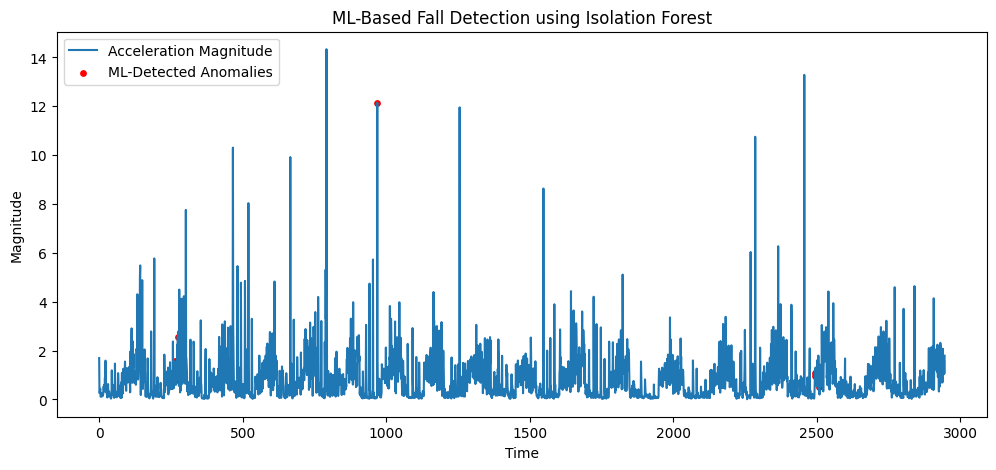

In [30]:
import numpy as np
import matplotlib.pyplot as plt

acc_mag = np.linalg.norm(X_test_scaled[:, :3], axis=1)

plt.figure(figsize=(12,5))
plt.plot(acc_mag, label="Acceleration Magnitude")

plt.scatter(
    np.where(fall_events),
    acc_mag[fall_events],
    color="red",
    s=15,
    label="ML-Detected Anomalies"
)

plt.legend()
plt.title("ML-Based Fall Detection using Isolation Forest")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()


In [31]:
from sklearn.metrics import accuracy_score

activity_pred = activity_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, activity_pred)

print("Activity Recognition Accuracy:", accuracy)


Activity Recognition Accuracy: 0.9267051238547676


In [33]:
print("Detected fall-like events:", fall_events.sum())



Detected fall-like events: 15


In [34]:
import pandas as pd

timestamps = pd.date_range(
    start="2026-01-01 10:00:00",
    periods=len(activity_pred),
    freq="100ms"  # simulate sensor sampling
)


In [35]:
tracking_log = pd.DataFrame({
    "timestamp": timestamps,
    "predicted_activity": activity_pred,
    "fall_detected": fall_events
})

tracking_log.head()


,timestamp,predicted_activity,fall_detected
0,2026-01-01 10:00:00.000,STANDING,False
1,2026-01-01 10:00:00.100,STANDING,False
2,2026-01-01 10:00:00.200,STANDING,False
3,2026-01-01 10:00:00.300,STANDING,False
4,2026-01-01 10:00:00.400,STANDING,False


In [36]:
tracking_log["risk_level"] = "Low"

if fall_events.sum() > 0:
    tracking_log.loc[tracking_log["fall_detected"], "risk_level"] = risk_level


In [37]:
tracking_log.to_csv("activity_tracking_log.csv", index=False)


In [38]:
for i in range(10):
    print(
        f"{tracking_log.iloc[i]['timestamp']} | "
        f"Activity: {tracking_log.iloc[i]['predicted_activity']} | "
        f"Fall: {tracking_log.iloc[i]['fall_detected']} | "
        f"Risk: {tracking_log.iloc[i]['risk_level']}"
    )


2026-01-01 10:00:00 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.100000 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.200000 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.300000 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.400000 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.500000 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.600000 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.700000 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.800000 | Activity: STANDING | Fall: False | Risk: Low
2026-01-01 10:00:00.900000 | Activity: STANDING | Fall: False | Risk: Low


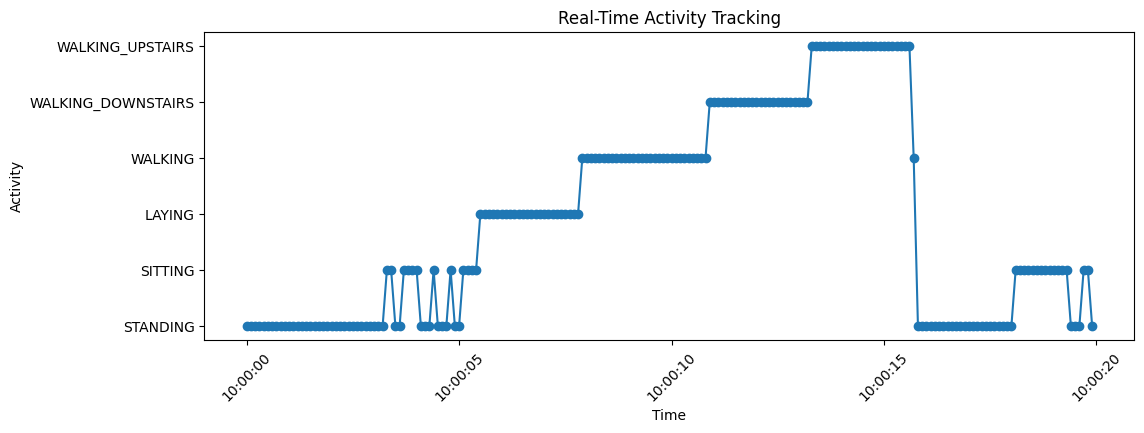

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(tracking_log["timestamp"][:200],
         tracking_log["predicted_activity"][:200],
         marker="o")
plt.xticks(rotation=45)
plt.title("Real-Time Activity Tracking")
plt.xlabel("Time")
plt.ylabel("Activity")
plt.show()
